# StackOverflow Canadian context

In this project I am to better understand the Canadian developers who participated in Stackoverflow's annual survey.

## Gather

In this gather stage I am importing the relevant Python modules as well as the data from the StackOverflow surveys for 2019. I also imported the schema for this dataset to better understand it.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

%matplotlib inline

df_2019 = pd.read_csv('./2019_survey_results_public.csv')
schema = pd.read_csv('./2019_survey_results_schema.csv')

# Assess

In [2]:
#in order to understand how this data I want to better understand it's basic structure.

df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
#Where that didn't display all the columns i'll also simply look at them using Pandas.DataFrame.columns

df_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [4]:
#Through the course I am familiar with the 2017 dataset from StackOverflow, but some of these columns appear different.
#So I loaded in the schema to take a look at it.

schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
...,...,...
80,Sexuality,Which of the following do you currently identi...
81,Ethnicity,Which of the following do you identify as? Ple...
82,Dependents,"Do you have any dependents (e.g., children, el..."
83,SurveyLength,How do you feel about the length of the survey...


In [5]:
#As the main point of this project is to look at Canadian data, I'll need to better understand that Country column.
countries = df_2019.Country.value_counts()
countries

United States                       20949
India                                9061
Germany                              5866
United Kingdom                       5737
Canada                               3395
                                    ...  
Niger                                   1
North Korea                             1
Saint Vincent and the Grenadines        1
Brunei Darussalam                       1
Sao Tome and Principe                   1
Name: Country, Length: 179, dtype: int64

In [6]:
#How many different countries are represented in the data?
countries.shape[0]

179

In [7]:
#How many records contain NaN values in the country column?
df_2019['Country'].isnull().sum()

132

In [8]:
print("Total records in 2019: ", df_2019.shape[0])
print("Records reporting a country: ", countries.sum())
print("Records missing a country: ", df_2019.shape[0] - countries.sum())
#Here I just wanted to check that that these missing values were == to the NaN values I found above.

Total records in 2019:  88883
Records reporting a country:  88751
Records missing a country:  132


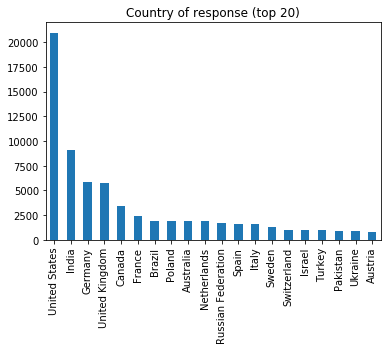

In [9]:
#with 179 countries it is obviously too messy to plot them all so let's look at the top 20.

(countries[:20]).plot(kind="bar");
plt.title("Country of response (top 20)");

# Clean

In [28]:
# I will remove the 132 records which had NaN values for 'Country'.
#This is because I'm going to compare Canadian vs non-Canadain responses, and the NaN ones could be either.
df_drop_c = df_2019.dropna(subset=['Country', 'DevType', 'EdLevel', 'YearsCode'], axis=0)
df_drop_c.head()
#Below I found a small proportion of NaN values in DevType, YearsCode, and EdLevel so they were added to the line above.

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
6,7,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,"Independent contractor, freelancer, or self-em...",Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Another engineering discipline (ex. civil, ele...",...,A lot more welcome now than last year,NaN,42.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Neither easy nor difficult


In [29]:
df_drop_c.shape[0]

79434

In [30]:
#I then want to see if I'm missing a lot of the vlaues in the data I want to analyse. This was used dynamically
print('proportion of NaN values')
print()
print('DevType: ',df_drop_c['DevType'].isnull().sum() / df_drop_c.shape[0])
print('EdLevel: ',df_drop_c['EdLevel'].isnull().sum() / df_drop_c.shape[0])
print('YearsCode: ',df_drop_c['YearsCode'].isnull().sum() / df_drop_c.shape[0])
print('ConvertedComp: ',df_drop_c['ConvertedComp'].isnull().sum() / df_drop_c.shape[0])
print('WorkWeekHrs: ',df_drop_c['WorkWeekHrs'].isnull().sum() / df_drop_c.shape[0])

proportion of NaN values

DevType:  0.0
EdLevel:  0.0
YearsCode:  0.0
ConvertedComp:  0.3175340534280031
WorkWeekHrs:  0.21335951859405292


In [38]:
#YearsCode is a problem because it doesn't simply contain numbers, it's crrently an object...
print(df_drop_c['YearsCode'].dtypes)

object


In [39]:
YearsCode = df_drop_c.YearsCode.value_counts()
YearsCode

10                    6411
5                     6128
6                     5520
8                     4972
7                     4897
4                     4792
3                     4230
15                    3811
20                    3492
12                    3384
9                     3145
2                     3057
11                    2150
14                    2055
13                    1952
18                    1827
25                    1586
16                    1535
30                    1433
1                     1336
17                    1301
19                     982
22                     976
Less than 1 year       919
35                     816
23                     710
21                     691
24                     665
28                     445
40                     428
32                     398
26                     391
27                     387
33                     319
38                     308
34                     297
37                     295
3

In [40]:
#It contains "Less than 1 year" and "More than 50 years". 
#To analyse these values they will be converted to 0.5 and 51 respetivly.

df_drop_c['YearsCode'] = df_drop_c['YearsCode'].replace('Less than 1 year', 0.5) 
df_drop_c['YearsCode'] = df_drop_c['YearsCode'].replace('More than 50 years', 51)

print(df_drop_c['YearsCode'].dtypes)

object


C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [41]:
df_drop_c['YearsCode'] = df_drop_c['YearsCode'].apply(pd.to_numeric) 

C:\Users\Nathan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
print(df_drop_c['YearsCode'].dtypes)

float64


In [43]:
YearsCode = df_drop_c.YearsCode.value_counts()
YearsCode

10.0    6411
5.0     6128
6.0     5520
8.0     4972
7.0     4897
4.0     4792
3.0     4230
15.0    3811
20.0    3492
12.0    3384
9.0     3145
2.0     3057
11.0    2150
14.0    2055
13.0    1952
18.0    1827
25.0    1586
16.0    1535
30.0    1433
1.0     1336
17.0    1301
19.0     982
22.0     976
0.5      919
35.0     816
23.0     710
21.0     691
24.0     665
28.0     445
40.0     428
32.0     398
26.0     391
27.0     387
33.0     319
38.0     308
34.0     297
37.0     295
36.0     274
29.0     219
31.0     189
39.0     154
42.0     104
45.0      88
41.0      81
43.0      73
51.0      48
44.0      46
50.0      29
48.0      24
47.0      23
46.0      21
49.0      20
Name: YearsCode, dtype: int64

In [45]:
#I don't want to pull the mean of the whole compensation or hours worked, so i'll split off a new df for Canada first
df_canada_2019 = df_drop_c[df_drop_c['Country'] == 'Canada']
df_canada_2019

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
11,12,I am a student who is learning to code,No,Never,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time",Some college/university study without earning ...,Mathematics or statistics,...,Just as welcome now as I felt last year,Courses on technologies you're interested in,21.0,Woman,No,Straight / Heterosexual,Black or of African descent,No,Appropriate in length,Easy
36,37,I code primarily as a hobby,Yes,Less than once per year,"OSS is, on average, of LOWER quality than prop...",Employed part-time,Canada,"Yes, full-time",Associate degree,"A social science (ex. anthropology, psychology...",...,Just as welcome now as I felt last year,NaN,27.0,Man,No,NaN,White or of European descent,No,Appropriate in length,Neither easy nor difficult
78,79,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,"Yes, full-time",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,20.0,Man,No,Straight / Heterosexual,East Asian,No,Appropriate in length,Neither easy nor difficult
95,96,"I used to be a developer by profession, but no...",No,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,43.0,Man,No,Straight / Heterosexual,South Asian,Yes,Too long,Easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88520,31955,NaN,No,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed part-time,Canada,"Yes, full-time","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat less welcome now than last year,Tech articles written by other developers,24.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
88557,36798,NaN,Yes,Never,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Canada,"Yes, full-time",Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,19.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult
88613,44621,NaN,No,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,Canada,"Yes, full-time",Primary/elementary school,NaN,...,A lot less welcome now than last year,Tech articles written by other developers,NaN,Woman,Yes,Bisexual,Black or of African descent;East Asian;Hispani...,NaN,Too long,Easy
88751,66751,NaN,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...","Not employed, but looking for work",Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,...,Somewhat more welcome now than last year,Courses on technologies you're interested in,35.0,Man,No,NaN,White or of European descent,No,Appropriate in length,Neither easy nor difficult


In [54]:
canada_num_vals = df_canada_2019[['ConvertedComp', 'Age', 'YearsCode']]
global_num_vals = df_drop_c[['ConvertedComp', 'Age', 'YearsCode']]
canada_num_vals.head()

,ConvertedComp,Age,YearsCode
5,366420.0,28.0,13.0
11,NaN,21.0,5.0
36,NaN,27.0,7.0
78,NaN,20.0,5.0
95,NaN,43.0,19.0


In [52]:
#This is the lamda function from the udacity lesson.
fill_mean = lambda col: col.fillna(col.mean())

In [55]:
fill_df_canada = canada_num_vals.apply(fill_mean, axis = 0)#Fill all missing values with the mean of the column.
# test look
fill_df_canada.head()

,ConvertedComp,Age,YearsCode
5,366420.000000,28.0,13.0
11,136090.997678,21.0,5.0
36,136090.997678,27.0,7.0
78,136090.997678,20.0,5.0
95,136090.997678,43.0,19.0


In [56]:
fill_df_global = global_num_vals.apply(fill_mean, axis = 0)#Fill all missing values with the mean of the column.
# test look
fill_df_global.head()

,ConvertedComp,Age,YearsCode
2,8820.00000,28.0,3.0
3,61000.00000,22.0,3.0
4,127206.35954,30.0,16.0
5,366420.00000,28.0,13.0
6,127206.35954,42.0,6.0


In [66]:
#looking at the values in EdLevel, they don't appear to need any cleaning.
print(df_canada_2019.EdLevel.value_counts())

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              1519
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                            447
Some college/university study without earning a degree                                 393
Associate degree                                                                       288
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     195
Other doctoral degree (Ph.D, Ed.D., etc.)                                               72
Primary/elementary school                                                               26
Professional degree (JD, MD, etc.)                                                      20
I never completed any formal education                                                  15
Name: EdLevel, dtype: int64


In [65]:
#looking at the values in DevType I see that they need some cleaning though...
print(df_canada_2019.DevType.value_counts())

Developer, full-stack                                                                                                                                                          368
Developer, back-end                                                                                                                                                            176
Developer, front-end                                                                                                                                                            84
Student                                                                                                                                                                         77
Developer, back-end;Developer, full-stack                                                                                                                                       76
                                                                                                         

In [74]:
#This total_counts function is repurposed from: "HowToBreakIntoTheField.py"


def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [76]:
#I'm basing this solution on the code provided in the lesson's videos





dev_type_vals = ["Developer, full-stack","Developer, back-end","Developer, front-end",
                 "Student","Database administrator", "Developer, desktop or enterprise applications", 
                 "Developer, QA or test", "DevOps specialist", "System administrator", "Engineer, site reliability",
                 "Developer, mobile", "Developer, embedded applications or devices", "Engineer, site reliability", 
                 "Developer, game or graphics", "Engineering manager", "Educator", "Scientist", "Product manager", 
                 "Engineer, data", "Senior executive/VP", "Marketing or sales professional", "Designer", "Academic researcher",
                 "Data or business analyst", "Data scientist or machine learning specialist"
                ]

def clean_dev_type(df):
    '''
    Input
        df - a dataframe holding the DevType column from the StackOverflow 2019 survey data
    
    Output
        dev_type_df - a dataframe with the count of individuals by DevType, includes double counting
    '''
    dev_type = df['DevType'].value_counts().reset_index()
    dev_type.rename(columns={'index': 'type', 'DevType': 'count'}, inplace = True)
    dev_type_df = total_count(dev_type, 'type', 'count', dev_type_vals)
    
    return dev_type_df
canada_dev_type = clean_dev_type(df_canada_2019)

In [91]:
#Now I can call that function to produce a dataframe for the developer types.
#Here that is for Canada

canada_dev_type = canada_dev_type.set_index('type')
canada_dev_type

,count
type,
"Developer, full-stack",1595
"Developer, back-end",1417
"Developer, front-end",923
"Developer, desktop or enterprise applications",610
"Developer, mobile",421
Student,412
DevOps specialist,378
Database administrator,359
System administrator,348


In [92]:
#And here it is for the whole world

global_dev_type = clean_dev_type(df_drop_c)
global_dev_type = global_dev_type.set_index('type')
global_dev_type

,count
type,
"Developer, full-stack",41321
"Developer, back-end",39738
"Developer, front-end",25934
"Developer, desktop or enterprise applications",16884
"Developer, mobile",14313
Student,11429
Database administrator,9230
Designer,8825
DevOps specialist,8711


## Analyze

In [57]:
fill_df_canada.describe()

,ConvertedComp,Age,YearsCode
count,2.975000e+03,2975.000000,2975.000000
mean,1.360910e+05,31.884658,13.719496
std,1.972984e+05,8.826201,9.663542
min,0.000000e+00,1.000000,0.500000
25%,5.725400e+04,26.000000,6.000000
50%,8.549900e+04,31.000000,11.000000
75%,1.360910e+05,36.000000,20.000000
max,2.000000e+06,99.000000,51.000000


In [58]:
fill_df_global.describe()

,ConvertedComp,Age,YearsCode
count,7.943400e+04,79434.000000,79434.000000
mean,1.272064e+05,30.738530,11.987870
std,2.346792e+05,8.200884,8.965658
min,0.000000e+00,1.000000,0.500000
25%,4.015050e+04,25.000000,5.000000
50%,9.600000e+04,30.000000,10.000000
75%,1.272064e+05,34.000000,16.000000
max,2.000000e+06,99.000000,51.000000


In [98]:
canada_dev_type = canada_dev_type.rename(columns={"count":"Canada"})
canada_dev_type

,Canada
type,
"Developer, full-stack",1595
"Developer, back-end",1417
"Developer, front-end",923
"Developer, desktop or enterprise applications",610
"Developer, mobile",421
Student,412
DevOps specialist,378
Database administrator,359
System administrator,348


In [99]:
global_dev_type = global_dev_type.rename(columns={"count":"Global"})
global_dev_type

,Global
type,
"Developer, full-stack",41321
"Developer, back-end",39738
"Developer, front-end",25934
"Developer, desktop or enterprise applications",16884
"Developer, mobile",14313
Student,11429
Database administrator,9230
Designer,8825
DevOps specialist,8711


In [101]:
developer_types_df = pd.concat([canada_dev_type, global_dev_type], axis=1, sort = True)
developer_types_df

,Canada,Global
Academic researcher,164,5783
Data or business analyst,229,6139
Data scientist or machine learning specialist,210,6349
Database administrator,359,9230
Designer,342,8825
DevOps specialist,378,8711
"Developer, QA or test",292,6156
"Developer, back-end",1417,39738
"Developer, desktop or enterprise applications",610,16884
"Developer, embedded applications or devices",272,7059


## Model

In [119]:
#With all the developer counts in it would be more inssightful to normalize them, to I'll create columns for proportions.
#We can then calculate the Location Quotient(LQ) for Canada to get an indication of it's global advantage
developer_types_df['Proportion_Canada'] = developer_types_df['Canada'] / developer_types_df.loc[:,'Canada'].sum()
developer_types_df['Proportion_Global'] = developer_types_df['Global'] / developer_types_df.loc[:,'Global'].sum()
developer_types_df['LQ_Canada'] = developer_types_df['Proportion_Canada'] / developer_types_df['Proportion_Global']
developer_types_df.sort_values(by='LQ_Canada', ascending=False, inplace = True)
developer_types_df

,Canada,Global,Proportion_Canada,Proportion_Global,LQ_Canada
"Developer, QA or test",292,6156,0.031684,0.024503,1.293049
"Developer, game or graphics",193,4297,0.020942,0.017104,1.224398
DevOps specialist,378,8711,0.041016,0.034673,1.182918
Engineering manager,169,4124,0.018338,0.016415,1.117117
System administrator,348,8662,0.037760,0.034478,1.095196
Marketing or sales professional,37,929,0.004015,0.003698,1.085717
Database administrator,359,9230,0.038954,0.036739,1.060287
Designer,342,8825,0.037109,0.035127,1.056433
"Developer, full-stack",1595,41321,0.173069,0.164474,1.052254
"Developer, embedded applications or devices",272,7059,0.029514,0.028098,1.050404


In [133]:
ed_value_df = pd.DataFrame(df_canada_2019['EdLevel'].value_counts())
ed_value_df = ed_value_df.rename(columns={"EdLevel":"Canada"})
ed_value_df['Global'] = df_drop_c['EdLevel'].value_counts()

ed_value_df['Proportion_Canada'] = ed_value_df['Canada'] / ed_value_df.loc[:,'Canada'].sum()
ed_value_df['Proportion_Global'] = ed_value_df['Global'] / ed_value_df.loc[:,'Global'].sum()
ed_value_df['LQ_Canada'] = ed_value_df['Proportion_Canada'] / ed_value_df['Proportion_Global']

ed_value_df.sort_values(by='LQ_Canada', ascending=False, inplace = True)
ed_value_df

,Canada,Global,Proportion_Canada,Proportion_Global,LQ_Canada
Associate degree,288,2733,0.096807,0.034406,2.813665
Some college/university study without earning a degree,393,9627,0.132101,0.121195,1.089986
"Bachelor’s degree (BA, BS, B.Eng., etc.)",1519,37426,0.510588,0.471158,1.083687
I never completed any formal education,15,411,0.005042,0.005174,0.974471
Primary/elementary school,26,754,0.008739,0.009492,0.920707
"Other doctoral degree (Ph.D, Ed.D., etc.)",72,2282,0.024202,0.028728,0.842435
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",195,6335,0.065546,0.079752,0.821878
"Master’s degree (MA, MS, M.Eng., MBA, etc.)",447,18749,0.150252,0.236032,0.636574
"Professional degree (JD, MD, etc.)",20,1117,0.006723,0.014062,0.478075


## Visualize

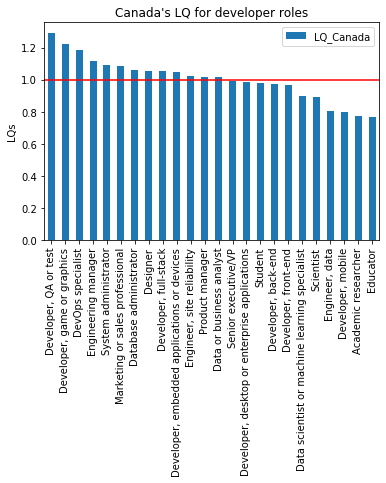

In [144]:
developer_types_df.plot(kind='bar',y='LQ_Canada').axhline(y=1, color='r');
plt.ylabel('LQs')
plt.savefig('dev_LQ.png', bbox_inches='tight');
plt.title("Canada's LQ for developer roles");

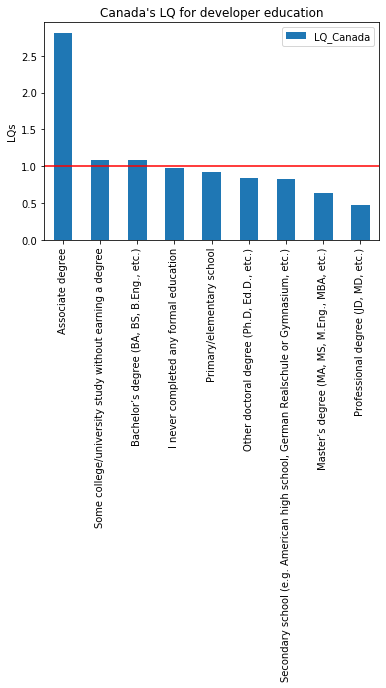

In [145]:
ed_value_df.plot(kind='bar',y='LQ_Canada').axhline(y=1, color='r');
plt.ylabel('LQs');
plt.savefig('ed_LQ.png', bbox_inches='tight');
plt.title("Canada's LQ for developer education");